In [1]:
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test_photo_to_biz.csv
test_photos
train.csv
train_photo_to_biz_ids.csv
train_photos



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

In [4]:
train_photos = pd.read_csv('../input/train_photo_to_biz_ids.csv')

204149.jpg


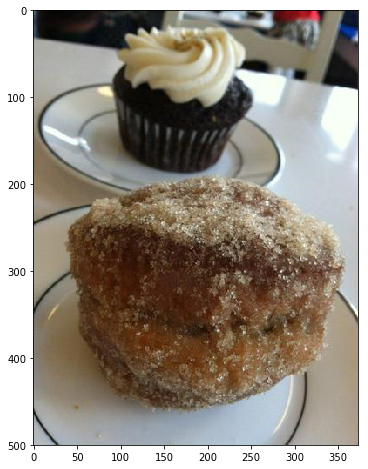

In [5]:
# show one image

import os
print(''.join([str(train_photos.photo_id[0]),'.jpg']))

from PIL import Image
im = Image.open(os.path.join('../input/','train_photos',''.join([str(train_photos.photo_id[0]),'.jpg'])))

plt.imshow(im)

In [6]:
train_attr = pd.read_csv('../input/train.csv')
train_attr['labels_list'] = train_attr['labels'].str.split(' ')
# find all the restaurants that are expensive (label=4)
train_attr['is_expensive'] = train_attr['labels'].str.contains('4')
expensive_businesses = train_attr[train_attr.is_expensive==True].business_id.tolist()
expensive_photos = train_photos[train_photos.business_id.isin(expensive_businesses)].photo_id.tolist()

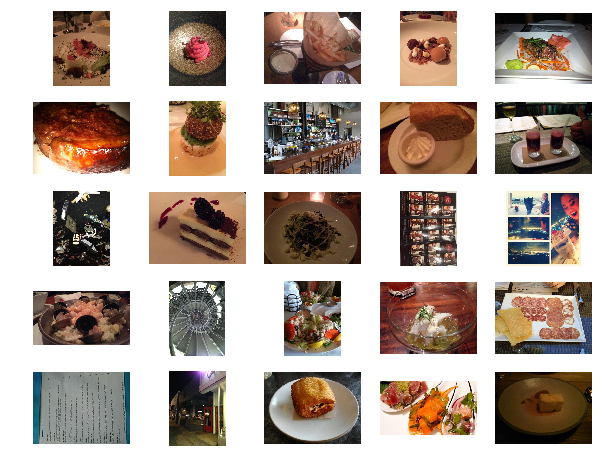

In [7]:
num_images_for_show = 5

photos_to_show = np.random.choice(expensive_photos,num_images_for_show**2)

for x in range(num_images_for_show ** 2):
        
        plt.subplot(num_images_for_show, num_images_for_show, x+1)
        im = Image.open(os.path.join('../input/','train_photos',''.join([str(photos_to_show[x]),'.jpg'])))
        plt.imshow(im)
        plt.axis('off')